<a href="https://colab.research.google.com/github/Lulu03damaris/Tareas_M/blob/main/Tarea06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ejercicio 1 polinomios de Taylor
from typing import Callable
import sympy as sym
from IPython.display import display
def taylor_approx(*, fcn: Callable[[float], float], x0: float, n : int)-> sym.Symbol:
  x=sym.symbols("x")
  f = sym.sympify(fcn(x))
  taylor: sym.Symbol=0
  for i in range  (n+1):
    taylor += f.diff(x,i).subs(x,x0) / sym.factorial(i)* (x-x0)**i
    display(taylor)
  return taylor

In [9]:
print("Polinomios de Taylor de la función 1 / (25 * x^2 + 1) ")
r=(taylor_approx(fcn= lambda x: 1/(25 * x**2 +1) , x0=0 , n=3))

Polinomios de Taylor de la función 1 / (25 * x^2 + 1) 


1

1

1 - 25*x**2

1 - 25*x**2

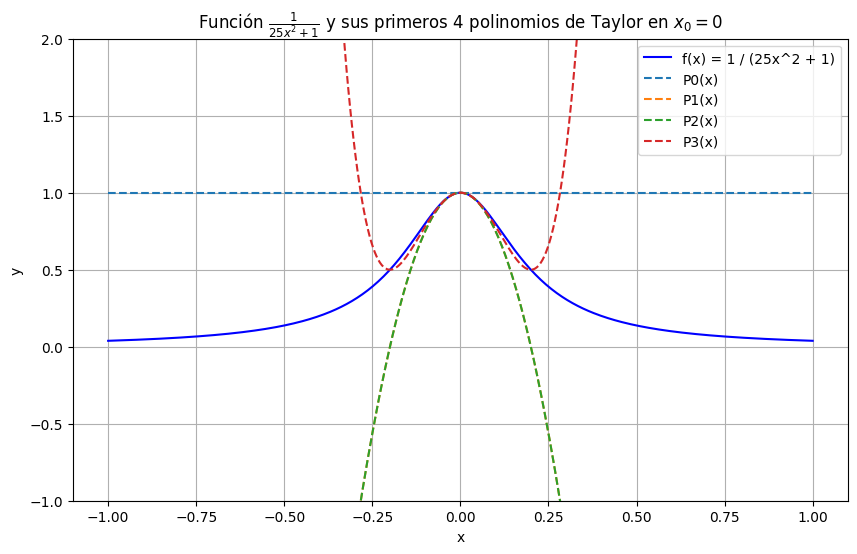

In [6]:
#Ejercicio 1 grafica de Taylor
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return 1 / (25 * x**2 + 1)

# Polinomios de Taylor en x0 = 0
def P0(x):
    return np.ones_like(x)

def P1(x):
    return 1 - 25 * x**2

def P2(x):
    return 1 - 25 * x**2

def P3(x):
    return 1 - 25 * x**2 + (625 * x**4) / 2

x = np.linspace(-1, 1, 400)
y = f(x)
y_P0 = P0(x)
y_P1 = P1(x)
y_P2 = P2(x)
y_P3 = P3(x)

# Gráficas
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = 1 / (25x^2 + 1)', color='blue')
plt.plot(x, y_P0, label='P0(x)', linestyle='--')
plt.plot(x, y_P1, label='P1(x)', linestyle='--')
plt.plot(x, y_P2, label='P2(x)', linestyle='--')
plt.plot(x, y_P3, label='P3(x)', linestyle='--')
plt.title('Función $\\frac{1}{25x^2 + 1}$ y sus primeros 4 polinomios de Taylor en $x_0=0$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-1, 2)
plt.show()


In [21]:
from typing import Callable
import sympy as sym
from IPython.display import display

def lagrange_approx(*, xs: list[float], ys: list[float]) -> sym.Symbol:
    """Approximate a set of points using Lagrange polynomials.

    ## Parameters
    ``x``: list of x values
    ``y``: list of y values

    ## Return
    ``lagrange``: the Lagrange polynomial

    """

    x = sym.symbols("x")
    lagrange: sym.Symbol = sym.S.Zero

    # -- Summation of the Lagrange polynomials
    for i in range(len(xs)):

        # -- Calculation of the Lagrange polynomial
        term = sym.S.One
        for j in range(len(xs)):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        term = sym.expand(term)
        lagrange += term * ys[i]

    return lagrange

In [22]:
lagrange_approx(xs=[0, 0.5, 1,1.5 ], ys=[1, 0.1379, 0.0384, 0.0174])

-0.912133333333333*x**3 + 2.8934*x**2 - 2.94286666666667*x + 1.0

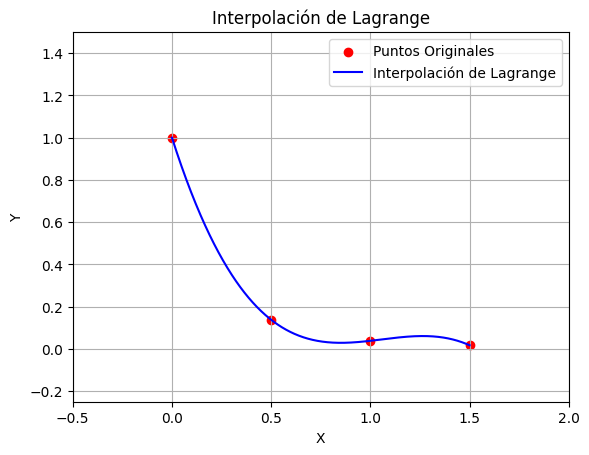

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def lagrange_approx(xs, ys):
    # Calcular el polinomio de interpolación de Lagrange
    poly = lagrange(xs, ys)

    # Crear un conjunto de puntos equidistantes para la gráfica suave
    x_interp = np.linspace(min(xs), max(xs), 1000)
    y_interp = poly(x_interp)

    # Graficar los puntos originales y la interpolación de Lagrange
    plt.scatter(xs, ys, color='red', label='Puntos Originales')
    plt.plot(x_interp, y_interp, color='blue', label='Interpolación de Lagrange')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación de Lagrange')
    plt.xlim([-0.5, 2])  # Ajustar los límites del gráfico según los datos
    plt.ylim([-0.25, 1.5])  # Ajustar los límites del gráfico según los datos
    plt.legend()
    plt.grid(True)
    plt.show()

xs = [0, 0.5, 1, 1.5]
ys = [1, 0.1379, 0.0384, 0.0174]

lagrange_approx(xs, ys)


In [38]:
# Ejercicio 2: Polinomios de Taylor
from typing import Callable
import sympy as sym
from IPython.display import display

def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Expr:
    x = sym.symbols("x")
    # Convertir la función lambda a una función simbólica de sympy
    f = sym.Lambda(x, fcn(x))
    taylor = sym.Rational(0)
    for i in range(n + 1):
        term = f(x).diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0)**i
        taylor += term
        print("\n")
        display(sym.simplify(taylor))
    return taylor

print("Polinomios de Taylor de la función arctan(x) ")
r = taylor_approx(fcn=lambda x: sym.atan(x), x0=1, n=3)

Polinomios de Taylor de la función arctan(x) 




pi/4

x/2 - 1/2 + pi/4

-x**2/4 + x - 3/4 + pi/4

x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4

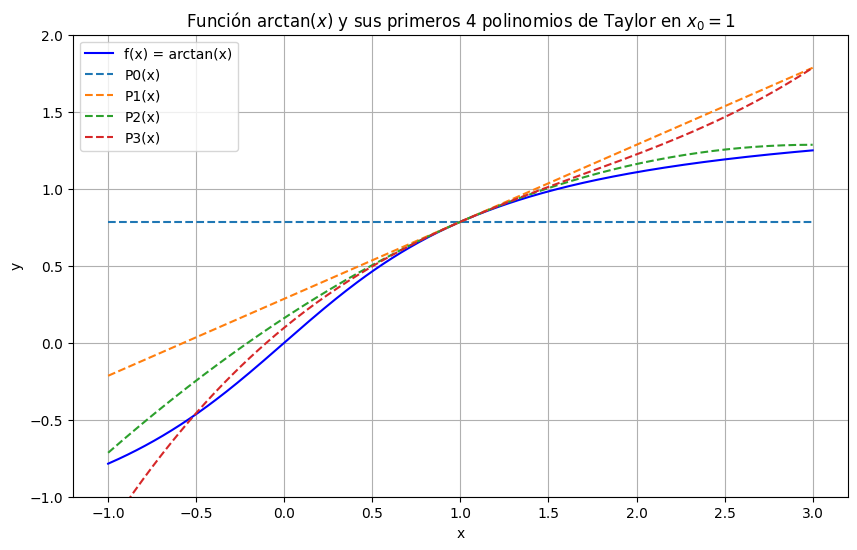

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return np.arctan(x)

# Polinomios de Taylor en x0 = 1
def P0(x):
    return np.arctan(1) * np.ones_like(x)

def P1(x):
    return np.arctan(1) + (1 / 2) * (x - 1)

def P2(x):
    return np.arctan(1) + (1 / 2) * (x - 1) - (1 / 8) * (x - 1)**2

def P3(x):
    return np.arctan(1) + (1 / 2) * (x - 1) - (1 / 8) * (x - 1)**2 + (1 / 16) * (x - 1)**3

# Rango de valores para x
x = np.linspace(-1, 3, 400)
y = f(x)
y_P0 = P0(x)
y_P1 = P1(x)
y_P2 = P2(x)
y_P3 = P3(x)

# Gráficas
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = arctan(x)', color='blue')
plt.plot(x, y_P0, label='P0(x)', linestyle='--')
plt.plot(x, y_P1, label='P1(x)', linestyle='--')
plt.plot(x, y_P2, label='P2(x)', linestyle='--')
plt.plot(x, y_P3, label='P3(x)', linestyle='--')
plt.title('Función $\\arctan(x)$ y sus primeros 4 polinomios de Taylor en $x_0=1$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-1, 2)
plt.show()


In [40]:
from typing import Callable
import sympy as sym
from IPython.display import display

def lagrange_approx(*, xs: list[float], ys: list[float]) -> sym.Symbol:
    """Approximate a set of points using Lagrange polynomials.

    ## Parameters
    ``x``: list of x values
    ``y``: list of y values

    ## Return
    ``lagrange``: the Lagrange polynomial

    """

    x = sym.symbols("x")
    lagrange: sym.Symbol = sym.S.Zero

    # -- Summation of the Lagrange polynomials
    for i in range(len(xs)):

        # -- Calculation of the Lagrange polynomial
        term = sym.S.One
        for j in range(len(xs)):
            if i != j:
                term *= (x - xs[j]) / (xs[i] - xs[j])
        term = sym.expand(term)
        lagrange += term * ys[i]

    return lagrange

In [41]:
lagrange_approx(xs=[1, 1.5, 2, 2.5], ys=[0.785, 0.983, 1.107, 1.190])

0.044*x**3 - 0.345999999999999*x**2 + 1.052*x + 0.0350000000000019

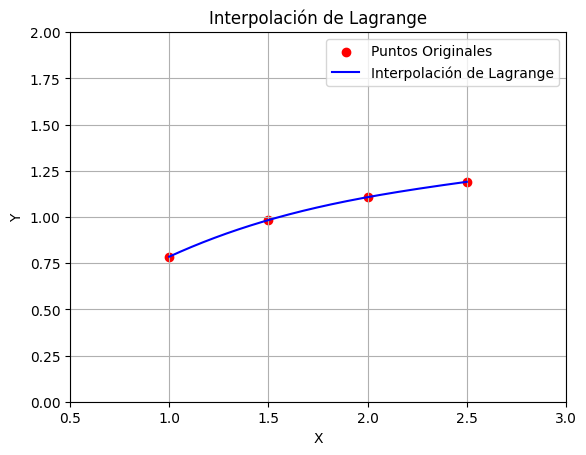

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def lagrange_approx(xs, ys):
    # Calcular el polinomio de interpolación de Lagrange
    poly = lagrange(xs, ys)

    # Crear un conjunto de puntos equidistantes para la gráfica suave
    x_interp = np.linspace(min(xs), max(xs), 1000)
    y_interp = poly(x_interp)

    # Graficar los puntos originales y la interpolación de Lagrange
    plt.scatter(xs, ys, color='red', label='Puntos Originales')
    plt.plot(x_interp, y_interp, color='blue', label='Interpolación de Lagrange')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Interpolación de Lagrange')
    plt.xlim([0.5, 3])  # Ajustar los límites del gráfico según los datos
    plt.ylim([0, 2])  # Ajustar los límites del gráfico según los datos
    plt.legend()
    plt.grid(True)
    plt.show()

xs=[1, 1.5, 2, 2.5]
ys=[0.785, 0.983, 1.107, 1.190]

lagrange_approx(xs, ys)